In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sp
strength = 0.5
eps = 1.0
no_sp_states = 32
A = 4
iterations = 60
#CCD for pairing model without considering a pair as a particle\


def paired_states(bra):
    x = []
    for i in np.arange(0,len(bra),2):
        x.append((bra[i]%2 != 0 and bra[i+1] == bra[i] + 1))
    res = x[0]
    for i in range(len(x)):
        res = res and x[i]
    return res

def ph_config(bra,ket):
    #returns number of ph excitations of a given state
    return len(set(bra) & set(ket))

def sp_energies(i,eps):
    #single particle (sp) energy in energy state i
    #eps:energy spacing between sp states 
    if i ==1 or i==2:
        return 0.0
    elif i%2 !=0 :
        return (i//2)*eps
    else:
        return (i/2 - 1)*eps



    
    
def V2(bra,ket):
    if paired_states(bra) == True and paired_states(ket) == True:
        if ph_config(bra,ket) == 0 or ph_config(bra,ket) == 2:
            return -strength/2.0
    else:
        return 0.0
    
    
    
    
nocc = np.arange(A+1,no_sp_states+1,1,dtype = int)  #not occupied states a,b,c...
nocc_len = len(nocc)
print('not occupied states = ', nocc)


occ = np.arange(1,A+1,1,dtype = int)  #occupied states i,j,k,...
print('occupied states = ', occ)


occ_len = len(occ)


#Since we are interested in only CCD, we are looking at states in ph_dict dictionary 
#Definition of all the arrays
t_vec = np.zeros((nocc_len,nocc_len,occ_len,occ_len))

V_pp_hh = np.zeros((nocc_len,nocc_len,occ_len,occ_len))

V_hh_pp = np.zeros((occ_len,occ_len,nocc_len,nocc_len))

V_pp_pp = np.zeros((nocc_len,nocc_len,nocc_len,nocc_len))

V_hh_hh = np.zeros((occ_len,occ_len,occ_len,occ_len))

f_h_h = np.zeros((occ_len,occ_len))

f_p_p = np.zeros((nocc_len, nocc_len))


print('Setting up matrix V_pp_hh')
for a in nocc:
    for b in nocc:
        for i in occ:
            for j in occ:
                if (j>= i) and (b >= a):
                    #print(a,b,i,j)
                    bra = [a,b]
                    ket = [i,j]
                    V_pp_hh[a-A-1][b-A-1][i-1][j-1] = V2(bra,ket)
                    if V_pp_hh[a-A-1][b-A-1][i-1][j-1] != 0.0 : 
                        V_pp_hh[a-A-1][b-A-1][j-1][i-1] = -V2(bra,ket)
                        V_pp_hh[b-A-1][a-A-1][j-1][i-1] = V2(bra,ket)
                        V_pp_hh[b-A-1][a-A-1][i-1][j-1] = -V2(bra,ket)
                if V_pp_hh[a-A-1][b-A-1][i-1][j-1] != 0:
                    print('a=',a,' ','b=',b,' ','i=',i,' ',\
                          'j=',j,' ','ME =',' ',V_pp_hh[a-A-1][b-A-1][i-1][j-1])

print('Setting up matrix V_hh_pp')
for i in occ:
    for j in occ:
        for a in nocc:
            for b in nocc:
                if (j>= i) and (b >= a):
                    #print(a,b,i,j)
                    bra = [i,j]
                    ket = [a,b]
                    V_hh_pp[i-1][j-1][a-A-1][b-A-1] = V2(bra,ket)
                    if V_hh_pp[i-1][j-1][a-A-1][b-A-1] != 0.0 : 
                        V_hh_pp[j-1][i-1][a-A-1][b-A-1] = -V2(bra,ket)
                        V_hh_pp[j-1][i-1][b-A-1][a-A-1] = V2(bra,ket)
                        V_hh_pp[i-1][j-1][b-A-1][a-A-1] = -V2(bra,ket)
                if V_hh_pp[i-1][j-1][a-A-1][b-A-1] != 0:
                    print('i=',i,' ','j=',j,' ','a=',a,' ',\
                          'b=',b,' ','ME =',' ',\
                          V_hh_pp[i-1][j-1][a-A-1][b-A-1])                    
                    
                    
                    
                    
print('Setting up V_hh_hh:')
for i in occ:
    for j in occ:
        for k in occ:
            for l in occ:
                if (j>= i) and (l >= k):
                    bra = [i,j]
                    ket = [k,l]
                    V_hh_hh[i-1][j-1][k-1][l-1] = V2(bra,ket)
                    if V_hh_hh[i-1][j-1][k-1][l-1] != 0.0 : 
                        V_hh_hh[i-1][j-1][l-1][k-1] = -V2(bra,ket)
                        V_hh_hh[j-1][i-1][l-1][k-1] = V2(bra,ket)
                        V_hh_hh[j-1][i-1][k-1][l-1] = -V2(bra,ket)
        
                if V_hh_hh[i-1][j-1][k-1][l-1] != 0:
                    print('i=',i,' ','j=',j,' ','k=',k,' ',\
                          'l=',l,' ','ME =',' ',V_hh_hh[i-1][j-1][k-1][l-1])
                    
print('Setting up V_pp_pp:')
for a in nocc:
    for b in nocc:
        for c in nocc:
            for d in nocc:
                if (b>= a) and (d >= c):
                    bra = [a,b]
                    ket = [c,d]
                    V_pp_pp[a-A-1][b-A-1][c-A-1][d-A-1] = V2(bra,ket)
                    if V_pp_pp[a-A-1][b-A-1][c-A-1][d-A-1] != 0.0 : 
                        V_pp_pp[a-A-1][b-A-1][d-A-1][c-A-1] = -V2(bra,ket)
                        V_pp_pp[b-A-1][a-A-1][d-A-1][c-A-1] = V2(bra,ket)
                        V_pp_pp[b-A-1][a-A-1][c-A-1][d-A-1] = -V2(bra,ket)
        
                if V_pp_pp[a-A-1][b-A-1][c-A-1][d-A-1] != 0:
                    print('a=',a,' ','b=',b,' ','c=',c,' ',\
                          'd=',d,' ','ME =',' ',\
                          V_pp_pp[a-A-1][b-A-1][c-A-1][d-A-1])

                    
print('Setting up f_h_h:')
for i in occ:
    for j in occ:
        #print(i,j)
        if i==j:
            f_h_h[i-1][j-1] = sp_energies(i,eps)
            #print(i,j,sp_energies(i,eps))
            term = 0.0
            for k in occ:
                term+= V_hh_hh[i-1][k-1][j-1][k-1]
                #print(i,k,j,k,term)
            f_h_h[i-1][j-1] += term
        if f_h_h[i-1][j-1] != 0 : 
            print('i=',i,' ','j=',j,' ','f_i_j =',f_h_h[i-1][j-1])

            
print('Setting up f_p_p:')
for a in nocc:
    for b in nocc:
        #print(i,j)
        if a==b:
            f_p_p[a-A-1][b-A-1] = sp_energies(a,eps) 
        if f_p_p[a-A-1][b-A-1] != 0 : 
            print('a=',a,' ','b=',b,' ','f_a_b =',f_p_p[a-A-1][b-A-1])


def E_ref(A):
    Eref = 0.0
    for i in range(A):
        Eref += sp_energies(i+1,eps)
    term = 0.0
    for i in range(A):
        for j in range(A):
            term += V_hh_hh[i][j][i][j]
    Eref += term*0.5
    return Eref

print(E_ref(A))

def ground_E(t_vec):
    val = 0.0
    for i in occ:
        for j in occ:
            for a in nocc:
                for b in nocc:
                    val += V_hh_pp[i-1][j-1][a-A-1][b-A-1]\
                    *t_vec[a-A-1][b-A-1][i-1][j-1]
                    
    val*= 0.25
    return val + E_ref(A)

                    
chi_b_c = np.einsum('klcd,dbkl->bc',V_hh_pp,t_vec)
chi_k_j = np.einsum('klcd,cdlj->kj',V_hh_pp,t_vec)
chi_bk_jc = np.einsum('klcd,dblj->bkjc',V_hh_pp,t_vec)
chi_ab_cd = np.einsum('klcd,abkl->abcd',V_hh_pp,t_vec)  


    
def H_ab_ij(chi_b_c,chi_k_j,chi_bk_jc,chi_ab_cd,t_vec) :

    diagram1 = V_pp_hh
        
        
    diagram2 = np.einsum('kj,abik->abji',f_h_h,t_vec)\
    -np.einsum('kj,abik->abij',f_h_h,t_vec) 
    
    
    diagram3 = -np.einsum('bc,acij->baij',f_p_p,t_vec) \
    + np.einsum('bc,acij->abij',f_p_p,t_vec)
        

    diagram5 = np.einsum('klij,abkl->abij',V_hh_hh,t_vec)
    diagram5 *= 0.5
    
            
    diagram6 = np.einsum('abcd,cdij->abij',V_pp_pp,t_vec)
    diagram6 *= 0.5
    

    diagram7 = (np.einsum('bc,acij->abij',chi_b_c,t_vec)\
                -np.einsum('bc,acij->baij',chi_b_c,t_vec))
    diagram7 *= 0.5
    
    
    diagram8 = np.einsum('kj,abik->abij',chi_k_j,t_vec)\
        -np.einsum('kj,abik->abji',chi_k_j,t_vec)
    diagram8 *= 0.5
            
    diagram9 = (np.einsum('bkjc,acik->abij',chi_bk_jc,t_vec) \
                - np.einsum('bkjc,acik->baij',chi_bk_jc,t_vec) \
            -np.einsum('bkjc,acik->abji',chi_bk_jc,t_vec) \
                + np.einsum('bkjc,acik->baji',chi_bk_jc,t_vec))        
    diagram9 *= 0.5
    
    diagram10 = np.einsum('cdij,abcd->abij',t_vec,chi_ab_cd)
    diagram10 *= 0.25
    
    return (diagram1  + diagram2 + diagram3 + diagram5 + diagram6 + \
            diagram7 + diagram8 + diagram9 + diagram10)


t_vec = np.zeros((nocc_len,nocc_len,occ_len,occ_len))
for a in nocc:
    for b in nocc:
        for i in occ:
            for j in occ:
                t_vec[a-A-1][b-A-1][i-1][j-1]= (V_pp_hh[a-A-1][b-A-1][i-1][j-1]\
                                               /(f_p_p[a-A-1][a-A-1] +f_p_p[b-A-1][b-A-1] \
                                                 - f_h_h[i-1][i-1] - f_h_h[j-1][j-1]))
                if t_vec[a-A-1][b-A-1][i-1][j-1] != 0:
                    print('a=', a, ' ', 'b=',b, ' ', 'i=',i,' ','j=',j,\
                          ' ','t_vec=', t_vec[a-A-1][b-A-1][i-1][j-1])
                    

                    
for nn in range(iterations):
    chi_b_c = np.einsum('klcd,dbkl->bc',V_hh_pp,t_vec)
    chi_k_j = np.einsum('klcd,cdlj->kj',V_hh_pp,t_vec)
    chi_bk_jc = np.einsum('klcd,dblj->bkjc',V_hh_pp,t_vec)
    chi_ab_cd = np.einsum('klcd,abkl->abcd',V_hh_pp,t_vec)

    Hmat_ab_ij = H_ab_ij(chi_b_c,chi_k_j,chi_bk_jc,chi_ab_cd,t_vec)
    for a in nocc:
        for b in nocc:
            for i in occ:
                for j in occ:
                    Hmat_ab_ij[a-A-1][b-A-1][i-1][j-1] *= (1.0/(f_p_p[a-A-1][a-A-1] + f_p_p[b-A-1][b-A-1] \
                      - f_h_h[i-1][i-1] - f_h_h[j-1][j-1]))

    
    t0 = t_vec - Hmat_ab_ij
    t0 = 0.5*t_vec + 0.5*t0
    E_before = ground_E(t_vec)
    t_vec = t0
                        
    #calculation of ground state correlation energy w.r.t reference E_c
    
    change_E = ground_E(t0) - E_before
    #print(change_E)
    print('nn', nn, ' ','ground state = ', ground_E(t0))
    if abs(change_E) <= 1e-6:
        break
    else:
        continue


not occupied states =  [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32]
occupied states =  [1 2 3 4]
Setting up matrix V_pp_hh
a= 5   b= 6   i= 1   j= 2   ME =   -0.25
a= 5   b= 6   i= 2   j= 1   ME =   0.25
a= 5   b= 6   i= 3   j= 4   ME =   -0.25
a= 5   b= 6   i= 4   j= 3   ME =   0.25
a= 6   b= 5   i= 1   j= 2   ME =   0.25
a= 6   b= 5   i= 2   j= 1   ME =   -0.25
a= 6   b= 5   i= 3   j= 4   ME =   0.25
a= 6   b= 5   i= 4   j= 3   ME =   -0.25
a= 7   b= 8   i= 1   j= 2   ME =   -0.25
a= 7   b= 8   i= 2   j= 1   ME =   0.25
a= 7   b= 8   i= 3   j= 4   ME =   -0.25
a= 7   b= 8   i= 4   j= 3   ME =   0.25
a= 8   b= 7   i= 1   j= 2   ME =   0.25
a= 8   b= 7   i= 2   j= 1   ME =   -0.25
a= 8   b= 7   i= 3   j= 4   ME =   0.25
a= 8   b= 7   i= 4   j= 3   ME =   -0.25
a= 9   b= 10   i= 1   j= 2   ME =   -0.25
a= 9   b= 10   i= 2   j= 1   ME =   0.25
a= 9   b= 10   i= 3   j= 4   ME =   -0.25
a= 9   b= 10   i= 4   j= 3   ME =   0.25
a= 10   b= 9   i= 1  

i= 4   j= 3   a= 31   b= 32   ME =   0.25
i= 4   j= 3   a= 32   b= 31   ME =   -0.25
Setting up V_hh_hh:
i= 1   j= 2   k= 1   l= 2   ME =   -0.25
i= 1   j= 2   k= 2   l= 1   ME =   0.25
i= 1   j= 2   k= 3   l= 4   ME =   -0.25
i= 1   j= 2   k= 4   l= 3   ME =   0.25
i= 2   j= 1   k= 1   l= 2   ME =   0.25
i= 2   j= 1   k= 2   l= 1   ME =   -0.25
i= 2   j= 1   k= 3   l= 4   ME =   0.25
i= 2   j= 1   k= 4   l= 3   ME =   -0.25
i= 3   j= 4   k= 1   l= 2   ME =   -0.25
i= 3   j= 4   k= 2   l= 1   ME =   0.25
i= 3   j= 4   k= 3   l= 4   ME =   -0.25
i= 3   j= 4   k= 4   l= 3   ME =   0.25
i= 4   j= 3   k= 1   l= 2   ME =   0.25
i= 4   j= 3   k= 2   l= 1   ME =   -0.25
i= 4   j= 3   k= 3   l= 4   ME =   0.25
i= 4   j= 3   k= 4   l= 3   ME =   -0.25
Setting up V_pp_pp:
a= 5   b= 6   c= 5   d= 6   ME =   -0.25
a= 5   b= 6   c= 6   d= 5   ME =   0.25
a= 5   b= 6   c= 7   d= 8   ME =   -0.25
a= 5   b= 6   c= 8   d= 7   ME =   0.25
a= 5   b= 6   c= 9   d= 10   ME =   -0.25
a= 5   b= 6   c= 10   d

a= 13   b= 14   c= 8   d= 7   ME =   0.25
a= 13   b= 14   c= 9   d= 10   ME =   -0.25
a= 13   b= 14   c= 10   d= 9   ME =   0.25
a= 13   b= 14   c= 11   d= 12   ME =   -0.25
a= 13   b= 14   c= 12   d= 11   ME =   0.25
a= 13   b= 14   c= 13   d= 14   ME =   -0.25
a= 13   b= 14   c= 14   d= 13   ME =   0.25
a= 13   b= 14   c= 15   d= 16   ME =   -0.25
a= 13   b= 14   c= 16   d= 15   ME =   0.25
a= 13   b= 14   c= 17   d= 18   ME =   -0.25
a= 13   b= 14   c= 18   d= 17   ME =   0.25
a= 13   b= 14   c= 19   d= 20   ME =   -0.25
a= 13   b= 14   c= 20   d= 19   ME =   0.25
a= 13   b= 14   c= 21   d= 22   ME =   -0.25
a= 13   b= 14   c= 22   d= 21   ME =   0.25
a= 13   b= 14   c= 23   d= 24   ME =   -0.25
a= 13   b= 14   c= 24   d= 23   ME =   0.25
a= 13   b= 14   c= 25   d= 26   ME =   -0.25
a= 13   b= 14   c= 26   d= 25   ME =   0.25
a= 13   b= 14   c= 27   d= 28   ME =   -0.25
a= 13   b= 14   c= 28   d= 27   ME =   0.25
a= 13   b= 14   c= 29   d= 30   ME =   -0.25
a= 13   b= 14   c= 30   d

a= 20   b= 19   c= 25   d= 26   ME =   0.25
a= 20   b= 19   c= 26   d= 25   ME =   -0.25
a= 20   b= 19   c= 27   d= 28   ME =   0.25
a= 20   b= 19   c= 28   d= 27   ME =   -0.25
a= 20   b= 19   c= 29   d= 30   ME =   0.25
a= 20   b= 19   c= 30   d= 29   ME =   -0.25
a= 20   b= 19   c= 31   d= 32   ME =   0.25
a= 20   b= 19   c= 32   d= 31   ME =   -0.25
a= 21   b= 22   c= 5   d= 6   ME =   -0.25
a= 21   b= 22   c= 6   d= 5   ME =   0.25
a= 21   b= 22   c= 7   d= 8   ME =   -0.25
a= 21   b= 22   c= 8   d= 7   ME =   0.25
a= 21   b= 22   c= 9   d= 10   ME =   -0.25
a= 21   b= 22   c= 10   d= 9   ME =   0.25
a= 21   b= 22   c= 11   d= 12   ME =   -0.25
a= 21   b= 22   c= 12   d= 11   ME =   0.25
a= 21   b= 22   c= 13   d= 14   ME =   -0.25
a= 21   b= 22   c= 14   d= 13   ME =   0.25
a= 21   b= 22   c= 15   d= 16   ME =   -0.25
a= 21   b= 22   c= 16   d= 15   ME =   0.25
a= 21   b= 22   c= 17   d= 18   ME =   -0.25
a= 21   b= 22   c= 18   d= 17   ME =   0.25
a= 21   b= 22   c= 19   d= 20  

a= 28   b= 27   c= 6   d= 5   ME =   -0.25
a= 28   b= 27   c= 7   d= 8   ME =   0.25
a= 28   b= 27   c= 8   d= 7   ME =   -0.25
a= 28   b= 27   c= 9   d= 10   ME =   0.25
a= 28   b= 27   c= 10   d= 9   ME =   -0.25
a= 28   b= 27   c= 11   d= 12   ME =   0.25
a= 28   b= 27   c= 12   d= 11   ME =   -0.25
a= 28   b= 27   c= 13   d= 14   ME =   0.25
a= 28   b= 27   c= 14   d= 13   ME =   -0.25
a= 28   b= 27   c= 15   d= 16   ME =   0.25
a= 28   b= 27   c= 16   d= 15   ME =   -0.25
a= 28   b= 27   c= 17   d= 18   ME =   0.25
a= 28   b= 27   c= 18   d= 17   ME =   -0.25
a= 28   b= 27   c= 19   d= 20   ME =   0.25
a= 28   b= 27   c= 20   d= 19   ME =   -0.25
a= 28   b= 27   c= 21   d= 22   ME =   0.25
a= 28   b= 27   c= 22   d= 21   ME =   -0.25
a= 28   b= 27   c= 23   d= 24   ME =   0.25
a= 28   b= 27   c= 24   d= 23   ME =   -0.25
a= 28   b= 27   c= 25   d= 26   ME =   0.25
a= 28   b= 27   c= 26   d= 25   ME =   -0.25
a= 28   b= 27   c= 27   d= 28   ME =   0.25
a= 28   b= 27   c= 28   d= 27

a= 22   b= 21   i= 4   j= 3   t_vec= -0.0135135135135
a= 23   b= 24   i= 1   j= 2   t_vec= -0.0111111111111
a= 23   b= 24   i= 2   j= 1   t_vec= 0.0111111111111
a= 23   b= 24   i= 3   j= 4   t_vec= -0.0121951219512
a= 23   b= 24   i= 4   j= 3   t_vec= 0.0121951219512
a= 24   b= 23   i= 1   j= 2   t_vec= 0.0111111111111
a= 24   b= 23   i= 2   j= 1   t_vec= -0.0111111111111
a= 24   b= 23   i= 3   j= 4   t_vec= 0.0121951219512
a= 24   b= 23   i= 4   j= 3   t_vec= -0.0121951219512
a= 25   b= 26   i= 1   j= 2   t_vec= -0.0102040816327
a= 25   b= 26   i= 2   j= 1   t_vec= 0.0102040816327
a= 25   b= 26   i= 3   j= 4   t_vec= -0.0111111111111
a= 25   b= 26   i= 4   j= 3   t_vec= 0.0111111111111
a= 26   b= 25   i= 1   j= 2   t_vec= 0.0102040816327
a= 26   b= 25   i= 2   j= 1   t_vec= -0.0102040816327
a= 26   b= 25   i= 3   j= 4   t_vec= 0.0111111111111
a= 26   b= 25   i= 4   j= 3   t_vec= -0.0111111111111
a= 27   b= 28   i= 1   j= 2   t_vec= -0.00943396226415
a= 27   b= 28   i= 2   j= 1   t_vec

In [63]:
t_vec = np.zeros((nocc_len,nocc_len,occ_len,occ_len))
for a in nocc:
    for b in nocc:
        for i in occ:
            for j in occ:
                t_vec[a-A-1][b-A-1][i-1][j-1]= (V_pp_hh[a-A-1][b-A-1][i-1][j-1]\
                                               /(f_p_p[a-A-1][a-A-1] +f_p_p[b-A-1][b-A-1] \
                                                 - f_h_h[i-1][i-1] - f_h_h[j-1][j-1]))
                if t_vec[a-A-1][b-A-1][i-1][j-1] != 0:
                    print('a=', a, ' ', 'b=',b, ' ', 'i=',i,' ','j=',j,\
                          ' ','t_vec=', t_vec[a-A-1][b-A-1][i-1][j-1])

                    
chi_b_c = np.einsum('klcd,dbkl->bc',V_hh_pp,t_vec)
chi_k_j = np.einsum('klcd,cdlj->kj',V_hh_pp,t_vec)
chi_bk_jc = np.einsum('klcd,dblj->bkjc',V_hh_pp,t_vec)
chi_ab_cd = np.einsum('klcd,abkl->abcd',V_hh_pp,t_vec)

print("Setting up Hmat_ab_ij :")    
Hmat_ab_ij = H_ab_ij(chi_b_c,chi_k_j,chi_bk_jc,chi_ab_cd,t_vec)

for a in nocc:
    for b in nocc:
        for i in occ:
            for j in occ:
                if Hmat_ab_ij[a-A-1][b-A-1][i-1][j-1] != 0.0:
                    print('a=', a, ' ', 'b=',b, ' ', 'i=',i,' ',\
                          'j=',j, 'ME=',\
                          ' ',Hmat_ab_ij[a-A-1][b-A-1][i-1][j-1])

                    


a= 5   b= 6   i= 1   j= 2   t_vec= -0.0555555555556
a= 5   b= 6   i= 2   j= 1   t_vec= 0.0555555555556
a= 5   b= 6   i= 3   j= 4   t_vec= -0.1
a= 5   b= 6   i= 4   j= 3   t_vec= 0.1
a= 6   b= 5   i= 1   j= 2   t_vec= 0.0555555555556
a= 6   b= 5   i= 2   j= 1   t_vec= -0.0555555555556
a= 6   b= 5   i= 3   j= 4   t_vec= 0.1
a= 6   b= 5   i= 4   j= 3   t_vec= -0.1
a= 7   b= 8   i= 1   j= 2   t_vec= -0.0384615384615
a= 7   b= 8   i= 2   j= 1   t_vec= 0.0384615384615
a= 7   b= 8   i= 3   j= 4   t_vec= -0.0555555555556
a= 7   b= 8   i= 4   j= 3   t_vec= 0.0555555555556
a= 8   b= 7   i= 1   j= 2   t_vec= 0.0384615384615
a= 8   b= 7   i= 2   j= 1   t_vec= -0.0384615384615
a= 8   b= 7   i= 3   j= 4   t_vec= 0.0555555555556
a= 8   b= 7   i= 4   j= 3   t_vec= -0.0555555555556
Setting up Hmat_ab_ij :
a= 5   b= 6   i= 1   j= 2 ME=   -0.435873694207
a= 5   b= 6   i= 2   j= 1 ME=   0.435873694207
a= 5   b= 6   i= 3   j= 4 ME=   -0.417716049383
a= 5   b= 6   i= 4   j= 3 ME=   0.417716049383
a= 6   b= 

In [90]:
#now we initialize t_vec using second perturbation theory

Hmat_ab_ij = np.zeros((nocc_len,nocc_len,occ_len,occ_len))

for a in nocc:
    for b in nocc:
        for i in occ:
            for j in occ:
                Hmat_ab_ij[a-A-1][b-A-1][i-1][j-1] = H_ab_ij(a,b,i,j,t_vec)
                if Hmat_ab_ij[a-A-1][b-A-1][i-1][j-1] != 0.0:
                    print('a=', a, ' ', 'b=',b, ' ', 'i=',i,' ','j=',j, 'ME=',\
                      ' ',Hmat_ab_ij[a-A-1][b-A-1][i-1][j-1])




a= 5   b= 6   i= 1   j= 2   t_vec= -0.0555555555556
a= 5   b= 6   i= 2   j= 1   t_vec= 0.0555555555556
a= 5   b= 6   i= 3   j= 4   t_vec= -0.1
a= 5   b= 6   i= 4   j= 3   t_vec= 0.1
a= 6   b= 5   i= 1   j= 2   t_vec= 0.0555555555556
a= 6   b= 5   i= 2   j= 1   t_vec= -0.0555555555556
a= 6   b= 5   i= 3   j= 4   t_vec= 0.1
a= 6   b= 5   i= 4   j= 3   t_vec= -0.1
a= 7   b= 8   i= 1   j= 2   t_vec= -0.0384615384615
a= 7   b= 8   i= 2   j= 1   t_vec= 0.0384615384615
a= 7   b= 8   i= 3   j= 4   t_vec= -0.0555555555556
a= 7   b= 8   i= 4   j= 3   t_vec= 0.0555555555556
a= 8   b= 7   i= 1   j= 2   t_vec= 0.0384615384615
a= 8   b= 7   i= 2   j= 1   t_vec= -0.0384615384615
a= 8   b= 7   i= 3   j= 4   t_vec= 0.0555555555556
a= 8   b= 7   i= 4   j= 3   t_vec= -0.0555555555556
a= 5   b= 6   i= 1   j= 2 ME=   -0.437606837607
a= 5   b= 6   i= 2   j= 1 ME=   0.437606837607
a= 5   b= 6   i= 3   j= 4 ME=   -0.422222222222
a= 5   b= 6   i= 4   j= 3 ME=   0.422222222222
a= 6   b= 5   i= 1   j= 2 ME=   0.

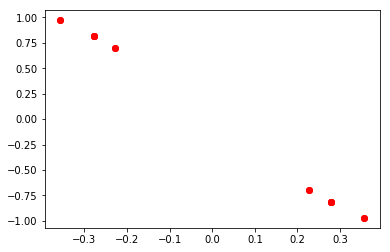

In [110]:
#now we can plot t_vec w.r.t t_initial

t_PT = np.zeros((nocc_len,nocc_len,occ_len,occ_len))
#t0 = np.zeros((nocc_len,nocc_len,occ_len,occ_len))
t_pt = []
t_0 = []
for a in nocc:
    for b in nocc:
        for i in occ:
            for j in occ:
                t_PT[a-A-1][b-A-1][i-1][j-1]= (V_pp_hh[a-A-1][b-A-1][i-1][j-1]\
                                               /(f_p_p[a-A-1][a-A-1] +f_p_p[b-A-1][b-A-1] \
                                                 - f_h_h[i-1][i-1] - f_h_h[j-1][j-1]))
                if t_PT[a-A-1][b-A-1][i-1][j-1] != 0:
                    t_pt.append(t_PT[a-A-1][b-A-1][i-1][j-1])
                if t0[a-A-1][b-A-1][i-1][j-1] != 0:
                    t_0.append(t0[a-A-1][b-A-1][i-1][j-1])
                
plt.plot(t_pt,t_0,'ro',label = 'g = 0.5')


In [111]:
t50 = t_0
tpt50 = t_pt

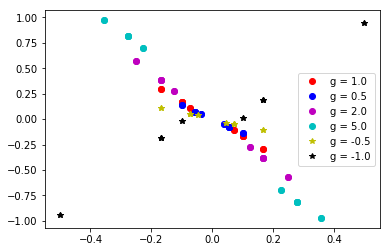

In [112]:
plt.plot(tpt10,t10,'ro',label = 'g = 1.0')
plt.plot(tpt05,t05,'bo',label = 'g = 0.5')
plt.plot(tpt20,t20,'mo',label = 'g = 2.0')
plt.plot(tpt50,t50,'co',label = 'g = 5.0')
plt.plot(tptm05,tm05,'y*',label = 'g = -0.5')
plt.plot(tptm10,tm10,'k*',label = 'g = -1.0')

plt.legend()